# Lead Score Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv("Leads.csv")

In [4]:
df_copy = df.copy()

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df.shape

(9240, 37)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
df.isnull().sum()[df.isnull().sum()>1]

Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
dtype: int64

many columns conatin high number of missing values

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


<AxesSubplot:>

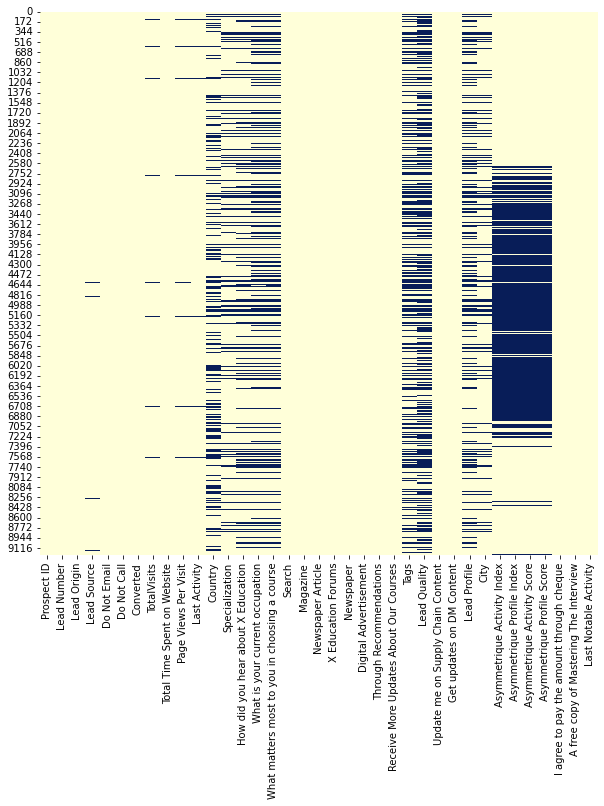

In [10]:
plt.figure(figsize=[10,10])
sns.heatmap(df.isnull(), cbar=False,cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

let us delete columns hvaing missing values more than 35%.

In [11]:
percent_null = df.isnull().mean().round(4).mul(100).sort_values(ascending=False)
percent_null

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [12]:
df.drop(df[percent_null[percent_null>35].index],axis=1,inplace=True)

In [13]:
df.shape

(9240, 31)

In [14]:
col_null = percent_null[(percent_null<35)&(percent_null>0)]

In [15]:
print(df.skew())
print("#"*100)
print(df.kurt())

Lead Number                     0.140451
Converted                       0.471058
TotalVisits                    19.911657
Total Time Spent on Website     0.956450
Page Views Per Visit            2.871793
dtype: float64
####################################################################################################
Lead Number                     -1.206393
Converted                       -1.778489
TotalVisits                    853.478706
Total Time Spent on Website     -0.403770
Page Views Per Visit            42.362348
dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5968\1000409609.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5968\1000409609.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.kurt())


total views and page views per visit has high skewness and kurtosis, lets see the relation between these column with our output column and decide the future.

In [16]:
print(df["TotalVisits"].corr(df["Converted"]))
print(df["Page Views Per Visit"].corr(df["Converted"]))

0.03039479882934853
-0.0033275115896345317


Both columns doesnt seem to have much co-relation with the output variable so we can delete those as well.

In [17]:
df.drop(["TotalVisits","Page Views Per Visit"],axis=1,inplace=True)

<AxesSubplot:>

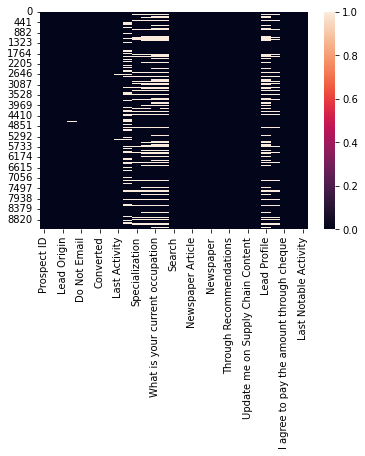

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.select_dtypes(include="O")

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,No,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,No,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,No,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,No,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,No,No,NaN,Other Metro Cities,No,No,SMS Sent


first of all lets drop prospect id and lead number columns as these columns are not useful for our analysis.

In [20]:
df.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

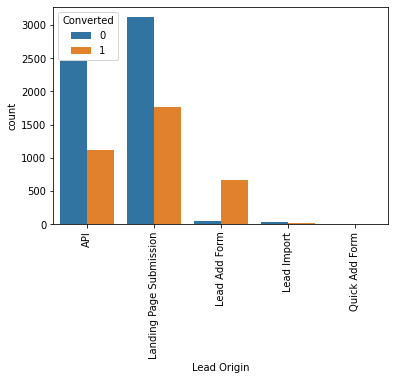

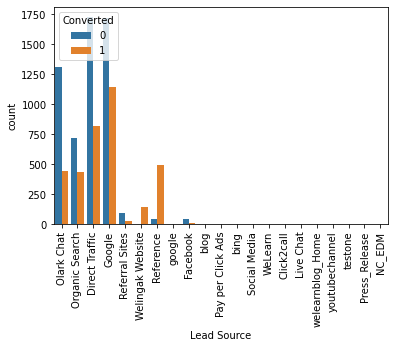

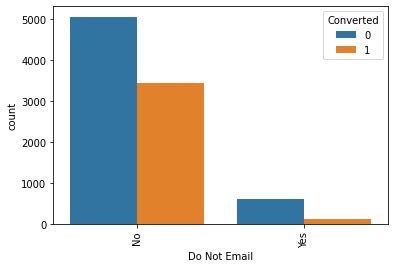

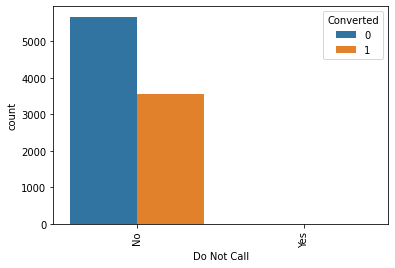

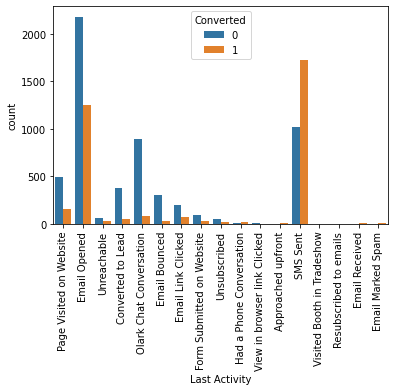

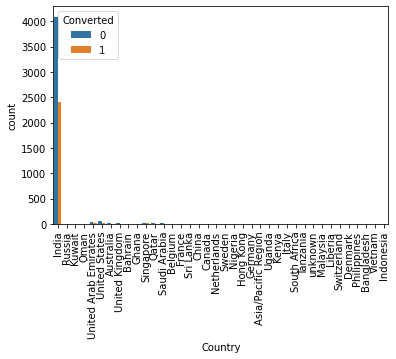

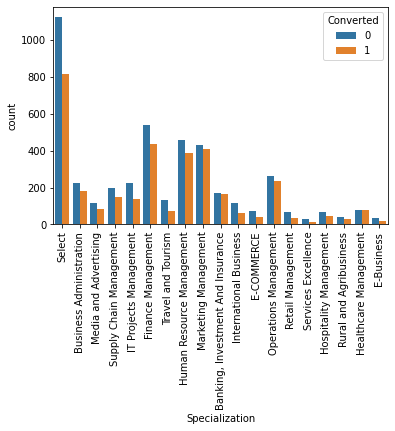

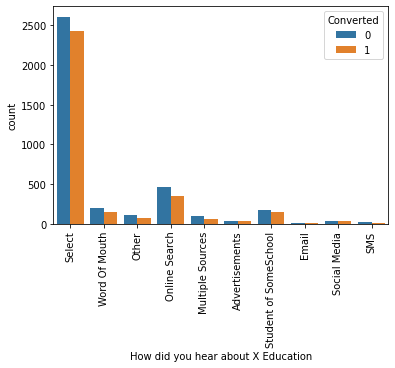

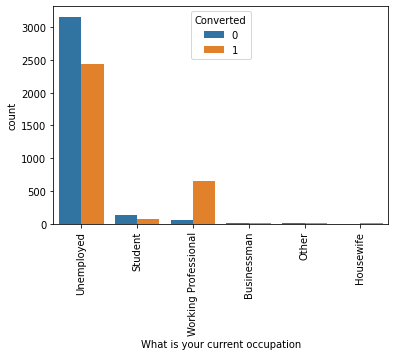

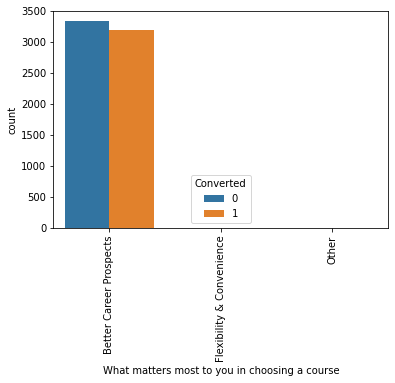

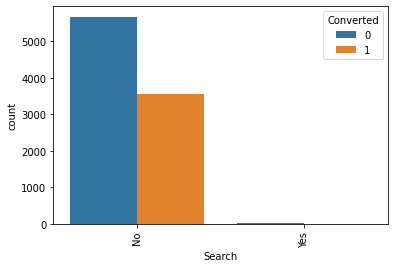

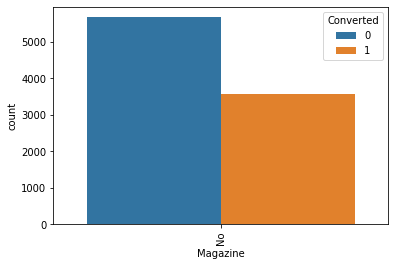

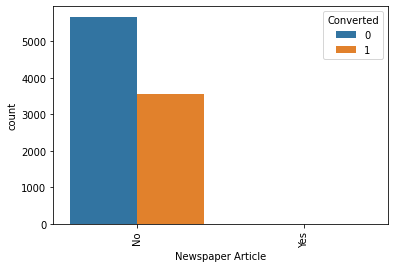

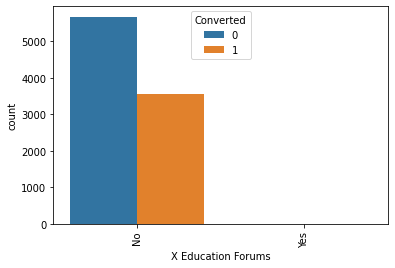

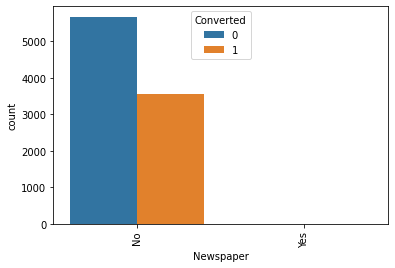

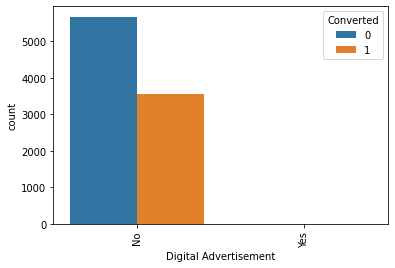

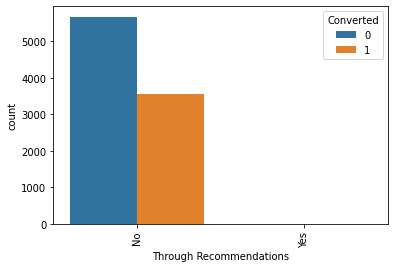

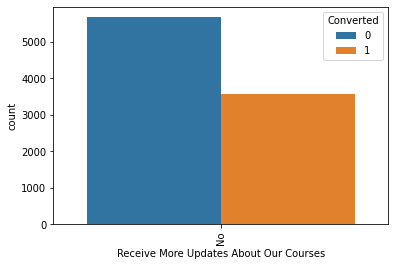

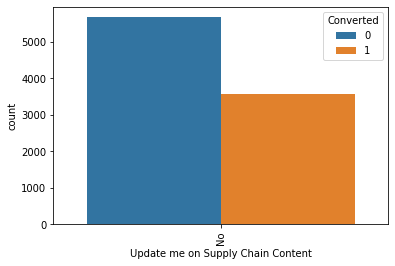

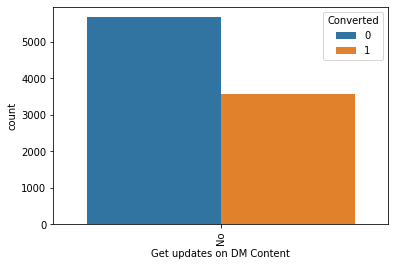

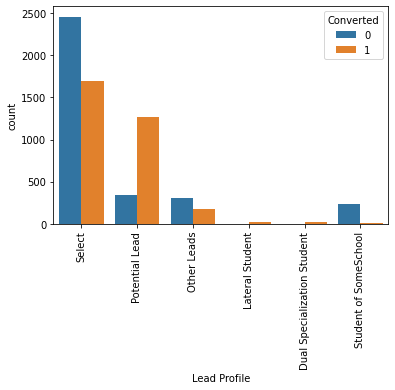

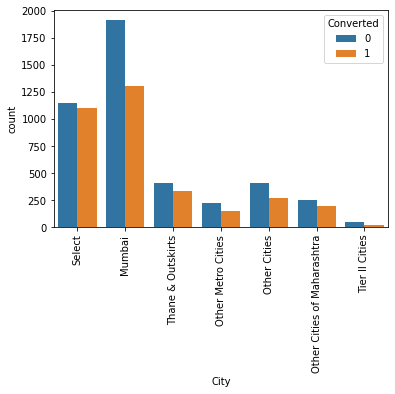

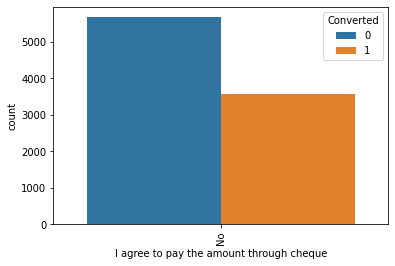

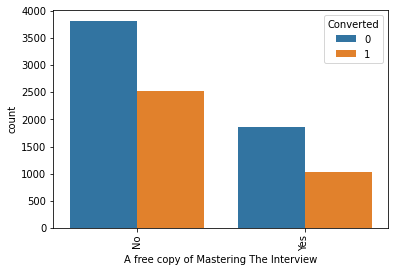

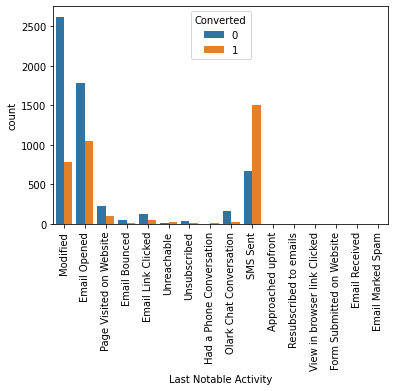

In [21]:
for n,col in enumerate(df.select_dtypes("O")):
    if col == "Converted":
        pass 
    else:
        sns.countplot(data=df,x=df[col],hue="Converted")
        plt.xticks(rotation=90)
        plt.show()

- Countries column: - Since it has only one value predominant column there is no significance of this column in our analysis.
- Select is one of the most choosed option in "Specialization","How did you hear about x Education" columns.
- How did you hear about X education: -  we can delete there column as most of the values are select which actually means nothing.
- What is your current occupation: - we can delete this column as well.
- What matters most to you in choosing a course - We can delete as well, as it contains only one value.
- Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement , Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile,I agree to pay amount though cheque, A free copy of Mastering The interview: - These columns can be delated due to only on variable or one varible predominance.

In [22]:
df.drop(df.nunique()[df.nunique()<=2].index,axis=1,inplace=True)

In [23]:
df.shape

(9240, 12)

In [24]:
df.drop("Country",axis=1,inplace=True)

In [25]:
for col in df:
    print("{}".format(col))
    print(df[col].value_counts()/len(df)*100)
    print("--"*30)

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
------------------------------------------------------------
Lead Source
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64
-----------

lets delete "How did you hear about X Education", "What matters most to you in choosing a course","Lead Profile" columns. 
I am keeping current occupation column for further analysis on basis of simple fact that unemployed people wants get new job and so they prefer this courses.

In [26]:
df.drop(["How did you hear about X Education", "What matters most to you in choosing a course","Lead Profile"],axis=1,inplace=True)

In [27]:
df

,Lead Origin,Lead Source,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,0,Page Visited on Website,Select,Unemployed,Select,Modified
1,API,Organic Search,674,Email Opened,Select,Unemployed,Select,Email Opened
2,Landing Page Submission,Direct Traffic,1532,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,305,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,1428,Converted to Lead,Select,Unemployed,Mumbai,Modified
...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1845,Email Marked Spam,IT Projects Management,Unemployed,Mumbai,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,238,SMS Sent,Media and Advertising,Unemployed,Mumbai,SMS Sent
9237,Landing Page Submission,Direct Traffic,199,SMS Sent,Business Administration,Unemployed,Mumbai,SMS Sent
9238,Landing Page Submission,Google,499,SMS Sent,Human Resource Management,NaN,Other Metro Cities,SMS Sent


The only reason to keep city column at this stage is the fact that people around a perticular city may attract towards the provider becuase of its service in that locality.

In [28]:
df.isnull().sum()

Lead Origin                           0
Lead Source                          36
Total Time Spent on Website           0
Last Activity                       103
Specialization                     1438
What is your current occupation    2690
City                               1420
Last Notable Activity                 0
dtype: int64

let us delete the rows having null values as around 60 of data will be still left with us for anaylsis.

In [29]:
df

,Lead Origin,Lead Source,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,0,Page Visited on Website,Select,Unemployed,Select,Modified
1,API,Organic Search,674,Email Opened,Select,Unemployed,Select,Email Opened
2,Landing Page Submission,Direct Traffic,1532,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,305,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,1428,Converted to Lead,Select,Unemployed,Mumbai,Modified
...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1845,Email Marked Spam,IT Projects Management,Unemployed,Mumbai,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,238,SMS Sent,Media and Advertising,Unemployed,Mumbai,SMS Sent
9237,Landing Page Submission,Direct Traffic,199,SMS Sent,Business Administration,Unemployed,Mumbai,SMS Sent
9238,Landing Page Submission,Google,499,SMS Sent,Human Resource Management,NaN,Other Metro Cities,SMS Sent


In [30]:
lead_df = pd.concat([df,df_copy["Converted"]],axis=1)

In [31]:
lead_df

,Lead Origin,Lead Source,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Converted
0,API,Olark Chat,0,Page Visited on Website,Select,Unemployed,Select,Modified,0
1,API,Organic Search,674,Email Opened,Select,Unemployed,Select,Email Opened,0
2,Landing Page Submission,Direct Traffic,1532,Email Opened,Business Administration,Student,Mumbai,Email Opened,1
3,Landing Page Submission,Direct Traffic,305,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,0
4,Landing Page Submission,Google,1428,Converted to Lead,Select,Unemployed,Mumbai,Modified,1
...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1845,Email Marked Spam,IT Projects Management,Unemployed,Mumbai,Email Marked Spam,1
9236,Landing Page Submission,Direct Traffic,238,SMS Sent,Media and Advertising,Unemployed,Mumbai,SMS Sent,0
9237,Landing Page Submission,Direct Traffic,199,SMS Sent,Business Administration,Unemployed,Mumbai,SMS Sent,0
9238,Landing Page Submission,Google,499,SMS Sent,Human Resource Management,NaN,Other Metro Cities,SMS Sent,1


now lets check the missing values in our final set of variables.


In [32]:
lead_df.isnull().sum()

Lead Origin                           0
Lead Source                          36
Total Time Spent on Website           0
Last Activity                       103
Specialization                     1438
What is your current occupation    2690
City                               1420
Last Notable Activity                 0
Converted                             0
dtype: int64

Lets delete the rows having null value.

In [33]:
lead_df = lead_df[~lead_df.isna().any(axis=1)]

In [34]:
lead_df.isnull().sum()

Lead Origin                        0
Lead Source                        0
Total Time Spent on Website        0
Last Activity                      0
Specialization                     0
What is your current occupation    0
City                               0
Last Notable Activity              0
Converted                          0
dtype: int64

In [35]:
lead_df.shape[0]/9240

0.6920995670995671

still we have retrived 69 percent of data which is a enough amount of rows to be utilized for our analysis.

In [36]:
lead_df

,Lead Origin,Lead Source,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Converted
0,API,Olark Chat,0,Page Visited on Website,Select,Unemployed,Select,Modified,0
1,API,Organic Search,674,Email Opened,Select,Unemployed,Select,Email Opened,0
2,Landing Page Submission,Direct Traffic,1532,Email Opened,Business Administration,Student,Mumbai,Email Opened,1
3,Landing Page Submission,Direct Traffic,305,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,0
4,Landing Page Submission,Google,1428,Converted to Lead,Select,Unemployed,Mumbai,Modified,1
...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,210,SMS Sent,Business Administration,Unemployed,Mumbai,Modified,1
9235,Landing Page Submission,Direct Traffic,1845,Email Marked Spam,IT Projects Management,Unemployed,Mumbai,Email Marked Spam,1
9236,Landing Page Submission,Direct Traffic,238,SMS Sent,Media and Advertising,Unemployed,Mumbai,SMS Sent,0
9237,Landing Page Submission,Direct Traffic,199,SMS Sent,Business Administration,Unemployed,Mumbai,SMS Sent,0


Here we have to decide on select value.
Which simply means no option select. 
So lets delete those rows as well.

In [60]:
lead_df.Specialization.replace("Select","Specialization_others",inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5968\1430296289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead_df.Specialization.replace("Select","Specialization_others",inplace=True)


In [67]:
lead_df.City.replace("Select","City_others",inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5968\1535593363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead_df.City.replace("Select","City_others",inplace=True)


In [68]:
for i in lead_df.columns:
    print(lead_df[i].value_counts()/len(lead_df)*100)
    print("###"*30)

Landing Page Submission    56.684910
API                        33.479281
Lead Add Form               9.382330
Lead Import                 0.453479
Name: Lead Origin, dtype: float64
##########################################################################################
Google               32.025020
Direct Traffic       29.288507
Olark Chat           13.964034
Organic Search       13.604378
Reference             7.224394
Welingak Website      2.017201
Referral Sites        1.172791
Facebook              0.469116
Click2call            0.062549
bing                  0.046912
Social Media          0.031274
Live Chat             0.031274
Pay per Click Ads     0.015637
WeLearn               0.015637
testone               0.015637
Press_Release         0.015637
Name: Lead Source, dtype: float64
##########################################################################################
0       21.125880
60       0.234558
127      0.218921
96       0.203284
87       0.203284
          ...   

From aboves observation we can see that columns contain multiple unique values have 2 or 3 values covering atleast 60-70% of the data. so lets manually merge all the small small percentage values in to one.

In [89]:
lead_origin_dummy = pd.get_dummies(df["Lead Origin"],prefix="Lead_origin",drop_first=True)

In [91]:
Lead_Source_dummy = pd.get_dummies(df["Lead Source"],prefix="Lead Source",drop_first=True)

In [92]:
Last_Activity_dummy = pd.get_dummies(df["Last Activity"],prefix="Last Activity",drop_first=True)

In [93]:
Specialization_dummy = pd.get_dummies(df["Specialization"],prefix="Specialization",drop_first=True)

In [94]:
What_is_your_current_occupation_dummy = pd.get_dummies(df["What is your current occupation"],prefix="occupation",drop_first=True)

In [95]:
Last_notified_dummy = pd.get_dummies(df["Last Notable Activity"],prefix="Specialization",drop_first=True)

In [96]:
lead_df = pd.concat([lead_df["Converted"],lead_origin_dummy,Lead_Source_dummy,Last_Activity_dummy,Specialization_dummy,What_is_your_current_occupation_dummy,Last_notified_dummy],axis=1)

In [104]:
lead_df = lead_df[~lead_df.isna().any(axis=1)]

In [106]:
lead_df

,Converted,Lead_origin_Landing Page Submission,Lead_origin_Lead Add Form,Lead_origin_Lead Import,Lead_origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Specialization_Email Bounced,Specialization_Email Link Clicked,Specialization_Email Marked Spam,Specialization_Email Opened,Specialization_Email Received,Specialization_Form Submitted on Website,Specialization_Had a Phone Conversation,Specialization_Modified,Specialization_Olark Chat Conversation,Specialization_Page Visited on Website,Specialization_Resubscribed to emails,Specialization_SMS Sent,Specialization_Unreachable,Specialization_Unsubscribed,Specialization_View in browser link Clicked
0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9235,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,0.0,1,0,0,